In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import factor_analyzer

        education        income       women    prestige       census
count  102.000000    102.000000  102.000000  102.000000   102.000000
mean    10.738039   6797.901961   28.979020   46.833333  5401.774510
std      2.728444   4245.922227   31.724931   17.204486  2644.993215
min      6.380000    611.000000    0.000000   14.800000  1113.000000
25%      8.445000   4106.000000    3.592500   35.225000  3120.500000
50%     10.540000   5930.500000   13.600000   43.600000  5135.000000
75%     12.647500   8187.250000   52.202500   59.275000  8312.500000
max     15.970000  25879.000000   97.510000   87.200000  9517.000000


/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/

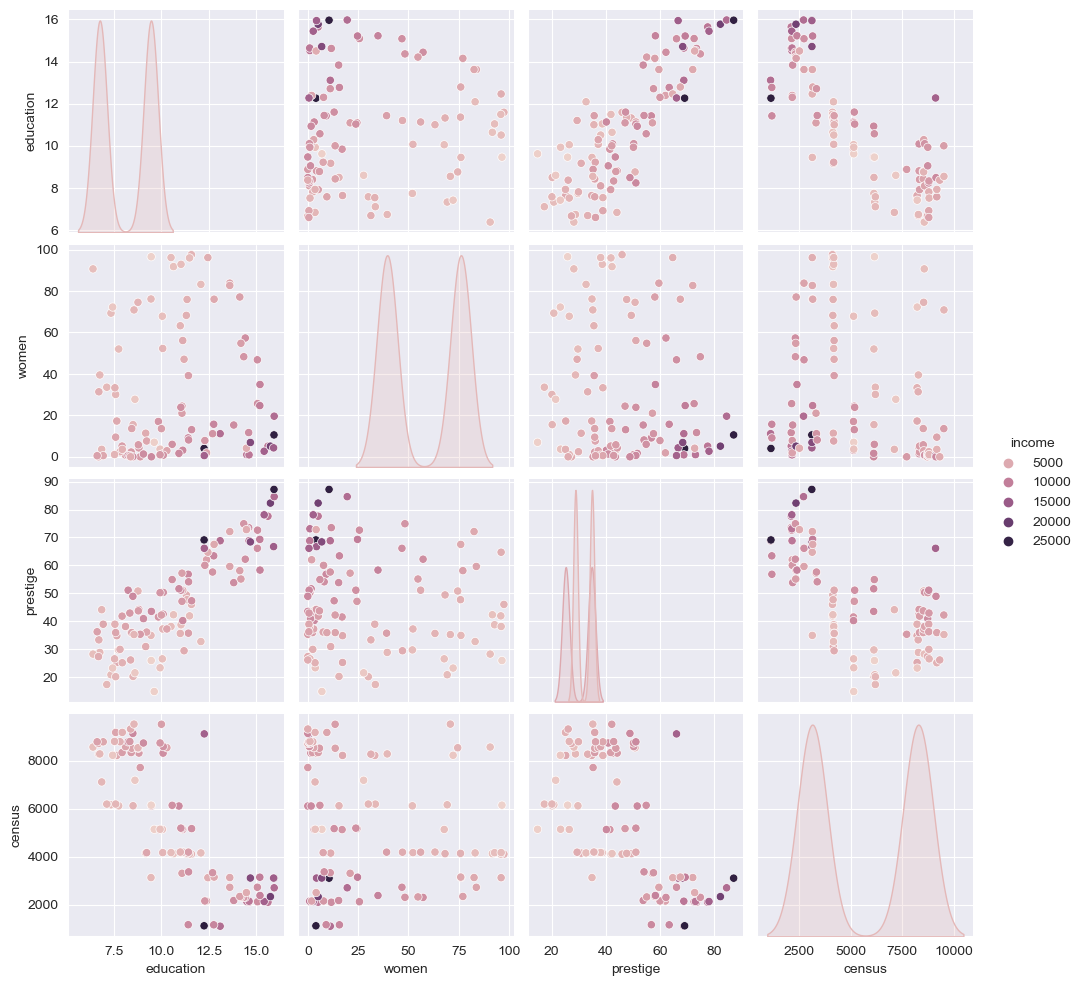

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('./data.csv')
print(df.describe())
df = df.drop('job', axis=1)
df = df.drop('type', axis=1)
sns.pairplot(df,hue='income',diag_kws={'bw':0.2})
plt.show()

In [37]:
Segment = df.pop('income')
scaler = StandardScaler()
df_t = pd.DataFrame(scaler.fit_transform(df))
df_t.describe()

,0,1,2,3
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,3.374207e-17,3.787820e-16,-6.530724e-17,2.808211e-16
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-1.605149e+00,-9.179571e-01,-1.871112e+00,-1.629476e+00
25%,-8.445703e-01,-8.041589e-01,-6.780591e-01,-8.667471e-01
50%,-7.294164e-02,-4.871552e-01,-1.888636e-01,-1.013583e-01
75%,7.032910e-01,7.356412e-01,7.267353e-01,1.105901e+00
max,1.927031e+00,2.170829e+00,2.357874e+00,1.563538e+00


           education     women  prestige    census
education   1.000000  0.061853  0.850177 -0.823088
women       0.061853  1.000000 -0.118334 -0.227003
prestige    0.850177 -0.118334  1.000000 -0.634510
census     -0.823088 -0.227003 -0.634510  1.000000


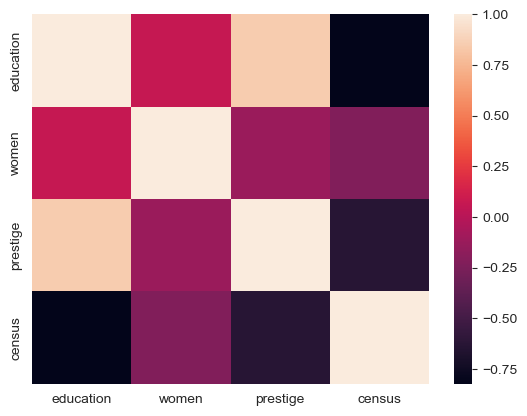

In [38]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

[0.63712884 0.26940723 0.07069535 0.02276858]


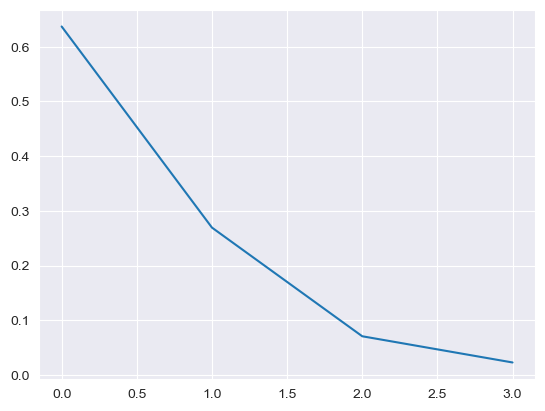

In [39]:
pca = PCA(n_components=4)
pc = pca.fit_transform(df_t)
v = pca.explained_variance_ratio_
print(v)
plt.plot(range(0, df_t.shape[1]), v)
plt.show()

[0.63712884 0.26940723]


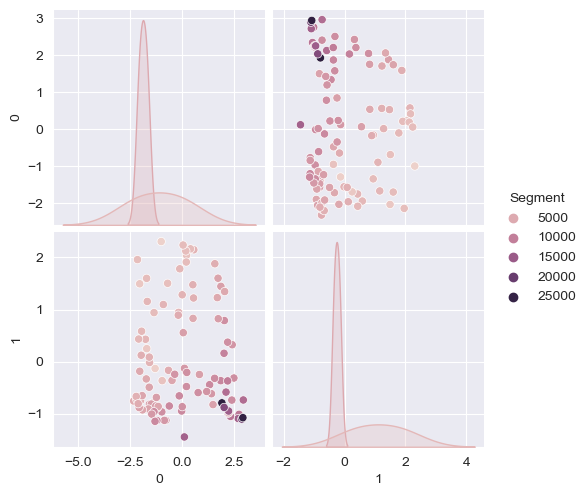

In [40]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment'] = Segment
sns.pairplot(pc, hue='Segment')
v=pca.explained_variance_ratio_
print(v)
plt.show()

In [42]:
fa=factor_analyzer.FactorAnalyzer(n_factors=5, rotation=None)
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads)
print(fa. get_communalities())
print(fa.get_uniquenesses())

[[ 0.98164624  0.01543287  0.1076039   0.        ]
 [ 0.07013022 -0.52969259  0.01100771  0.        ]
 [ 0.86666836  0.33702926 -0.05377291  0.        ]
 [-0.85116711  0.31732283  0.07025373  0.        ]]
[0.97544611 0.28561366 0.86759429 0.83011482]
[0.02455389 0.71438634 0.13240571 0.16988518]


In [43]:
fa = factor_analyzer.FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())

[[ 0.97893741 -0.09647789  0.08842891  0.        ]
 [ 0.01039751 -0.53432536  0.00139963  0.        ]
 [ 0.89792936  0.23876564 -0.06563631  0.        ]
 [-0.80876226  0.40934302  0.09196045  0.        ]]
[0.97544611 0.28561366 0.86759429 0.83011482]
[0.02455389 0.71438634 0.13240571 0.16988518]
